<center><img src="https://dinus.ac.id/wp-content/uploads/2024/11/Logo-Web-Udinus-Putih.png"  width="400">


# Jawaban Ujian BK Associate Data Scientist - Teknik Informatika S1 - 11 Januari 2025
</center>

PANDUAN:
- **WAJIB MENGISI SEMUA UNIT**
- DIPERBOLEHKAN MEMBUKA FILE LAMPAU, TAPI TIDAK BOLEH MENGGUNAKAN CHATGPT, GEMINI, CLAUDE, DAN LLM LAINNYA
- JIKA SUDAH SELESAI, SILAKAN MENGABARI PENGUJI UNTUK DINILAI

# Latar Belakang Masalah
Kesehatan adalah pilar utama kehidupan. Salah satu ancaman serius yang dihadapi masyarakat saat ini adalah **gagal jantung**, penyakit kronis yang menjadi penyebab utama kematian di seluruh dunia. Gagal jantung terjadi ketika jantung tidak mampu memompa darah yang cukup untuk memenuhi kebutuhan tubuh, yang sering kali berujung pada komplikasi yang mengancam jiwa.

Menyadari pentingnya penanganan dini dan akurat terhadap penyakit ini, dunia medis dan teknologi bekerja sama untuk menghadirkan solusi berbasis data. Salah satu langkah penting adalah pemanfaatan dataset medis untuk membangun model prediksi yang dapat membantu dokter dan tenaga medis dalam mengidentifikasi pasien berisiko tinggi.

Dataset **Heart Failure Clinical Records**, yang terdiri dari 299 catatan medis pasien gagal jantung, menyediakan data penting yang mencakup berbagai faktor seperti `age`, `anaemia`, `creatinine_phosphokinase`, `diabetes`, `ejection_fraction`, `high_blood_pressure`, `platelets`, `serum_creatinine`, `serum_sodium`, `sex`, `smoking`, `time`, `death_event`. Informasi ini menjadi fondasi untuk mengembangkan model prediktif yang akurat.

# Tujuan Ujian Sertifikasi
Tujuan utama dari analisis dataset ini adalah:
1. **Mengidentifikasi variabel kunci** yang memengaruhi risiko mortalitas pasien gagal jantung.
2. **Membangun model prediktif** yang dapat membantu memprediksi kelangsungan hidup pasien gagal jantung.

Dengan hasil analisis ini, diharapkan dataset dapat memberikan wawasan yang berharga kepada rumah sakit, tenaga medis, dan pembuat kebijakan dalam mengurangi angka kematian akibat gagal jantung.

# Terkait Dataset
- **Sumber Data**: [Heart Failure Clinical Records Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)
- **Jumlah Sampel Data**: 299 pasien
- **Jumlah Atribut**: 13 atribut, meliputi: `age`, `anaemia`, `creatinine_phosphokinase`, `diabetes`, dan lainnya.
- **Label**: Kematian pasien selama periode tindak lanjut (0 = hidup, 1 = meninggal).

# Pendekatan Analisis
Untuk mendukung analisis dataset ini, akan dibuat skema komparasi model prediksi yang dilakukan dengan dua pendekatan berbeda:

1. **Menggunakan Dua Fitur Penting**: Model akan dibangun hanya dengan menggunakan dua fitur kunci, yaitu `serum_creatinine` dan `ejection_fraction`. Kedua fitur ini dipilih karena memiliki hubungan signifikan dengan fungsi ginjal dan keseimbangan elektrolit yang berdampak pada kondisi gagal jantung.

2. **Menggunakan Semua Fitur**: Model akan dibangun dengan memanfaatkan semua 13 fitur yang tersedia dalam dataset untuk melihat seberapa besar peningkatan akurasi dan performa jika semua informasi digunakan.

Studi ini berfokus pada dataset 299 pasien yang dikumpulkan pada tahun 2015 untuk mengevaluasi apakah dua faktor klinis utama **serum creatinine** dan **ejection fraction** cukup, untuk memprediksi kelangsungan hidup pasien dengan lebih akurat dibandingkan menggunakan seluruh data fitur klinis.




## LOAD LIBRARY - MASUKKAN LIBRARY PYTHON YANG AKAN ANDA GUNAKAN

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data
- Load Data dan Ganti nama kolom yang masih berupa index dan ganti menjadi berikut pada dataframe :

  age, anaemia, creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine, serum_sodium, sex, smoking,time,death_event

###Load Dataset
Metode: Load dari Google Drive

In [ ]:
# Buat akses dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baca dataset menggunakan library pandas dan masukkan ke sebuah variabel (misalnya df)
df = pd.read_csv('/content/drive/MyDrive/Bengkod/LSP/heart_failure_clinical_records_dataset_missing_new.csv')

# Tampilkan 5 data teratas dari dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
4,65.0,1,160.0,1,NaN,0,327000.00,2.7,116,0,0.0,8,1


> Terlihat bahwa kolom belum terdapat nama, sehingga dibutuhkan penamaan pada masing-masing kolom

###Masukkan Nama Fitur ke Dataset

In [ ]:
cols =['age', 'anemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking','time','death_event']

# Mengganti nama kolom dataframe dengan cols
df.columns = cols

In [ ]:
# Tampilkan data setelah nama kolom berhasil diganti.
df.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
4,65.0,1,160.0,1,NaN,0,327000.00,2.7,116,0,0.0,8,1


## BAB 2 – (J.62DMI00.005.1) Menelaah data

- Pada tahap ini, kita akan menelaah data yang ada pada dataset Heart Failure Prediction. Kita akan melihat informasi data, statistik deskriptif, dan distribusi data.

###Melihat Informasi Dataset

In [ ]:
# Melihat Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       269 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  284 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         296 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 269 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   275 non-null    float64
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


> Dari informasi dataset di atas, terlihat beberapa hal antara lain:
- Terdapat perbedaan jumlah data Non-Null yang mengidentifikasikan adanya beberapa missing value
- Seluruh data bertipe numerik

###Memeriksa Deskripsi Statistik Dataset

In [ ]:
# Melihat Deskripsi statistik
df.describe()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,269.000000,299.000000,284.000000,299.000000,296.000000,299.000000,269.000000,299.00000,299.000000,299.000000,275.000000,299.000000,299.00000
mean,61.057004,0.431438,570.947183,0.418060,38.064189,0.351171,261182.344796,1.39388,136.625418,0.648829,0.323636,130.260870,0.32107
std,12.096525,0.496107,973.348989,0.494067,11.778720,0.478136,98953.721912,1.03451,4.412477,0.478136,0.468716,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.000000,4.000000,0.00000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,211000.000000,0.90000,134.000000,0.000000,0.000000,73.000000,0.00000
50%,60.000000,0.000000,247.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.000000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.40000,140.000000,1.000000,1.000000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.000000,285.000000,1.00000


###Memeriksa Nilai Unik

In [ ]:
# Melihat data unik pada masing-masing kolom
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

Unique values in column 'age':
[75.    55.    65.    50.    90.    60.       nan 80.    62.    45.
 49.    82.    87.    70.    48.    68.    53.    95.    58.    94.
 85.    69.    72.    51.    57.    41.    42.    67.    79.    59.
 44.    63.    86.    43.    46.    61.    81.    52.    64.    40.
 60.667 77.    78.    54.    73.    47.    56.   ]

Unique values in column 'anemia':
[0 1]

Unique values in column 'creatinine_phosphokinase':
[ 582. 7861.  146.  111.  160.   47.  246.   nan  157.  123.   81.  231.
  981.  168.   80.  379.  149.  125.   52.  128.   63.  148.  112.  122.
   60.   70.   23.  249.  159.   94.  855. 2656.  235.  124.  571.  127.
  588. 1380.  553.  129.  577.   91. 3964.   69.  260.  371.   75.  789.
  364. 7702.  318.  109.   68.  110.  161.  113. 5882.  224.   92.  102.
  203.  336.   76.   55.  280.   78.   84.  115.   66.  897.  154.  144.
  133.  514.   59.  156.   61.  305.  898. 5209.   53.  328. 1876.  936.
  292.  369.  143.  754.  400.   96.  737

> Setelah melihat deskripsi mengenai masing-masing kolom dataset yang terdapat pada soal dan melihat nilai unik di atas, dapat diperoleh kesimpulan antara lain:
*   Terdapat beberapa kolom yang bertipe kategorikal antara lain: anemia, diabetes, high_blood_pressure, sex, smoking, dan death_event
*   Terdapat beberapa kolom yang bertipe numerik antara lain: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, dan time




### Nominal Feature

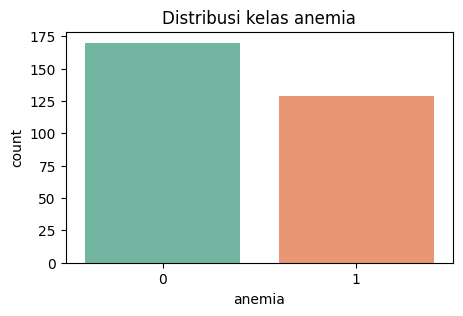

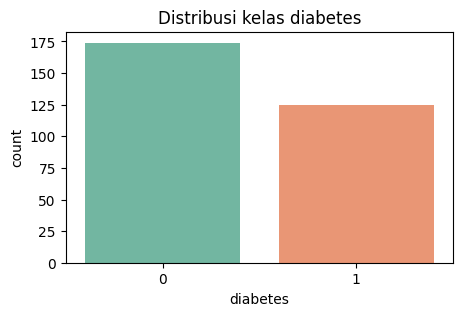

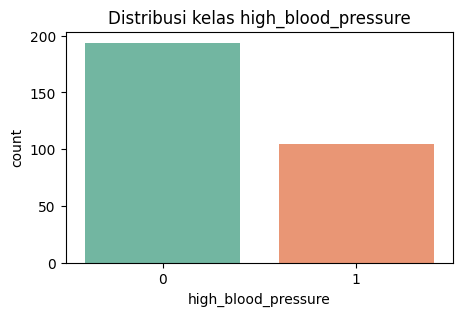

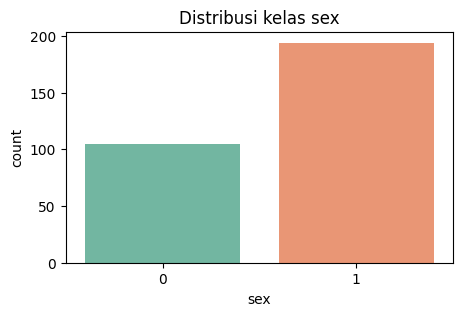

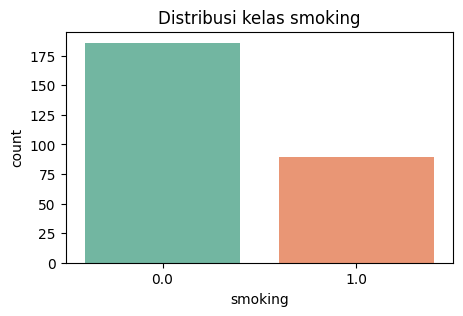

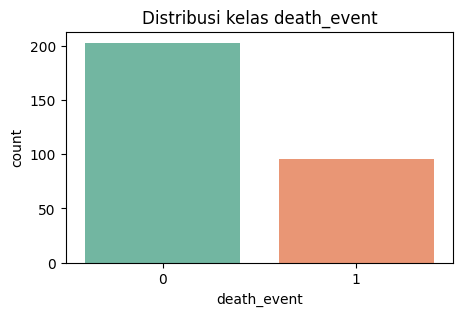

In [ ]:
# Visualisasikan fitur nominal / kategorikal misal (menggunakan countplot)
categorical_cols = ['anemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']
for col in categorical_cols:
    plt.figure(figsize=(5, 3))

    ax = sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Distribusi kelas {col}')

    plt.show()

### Continous features

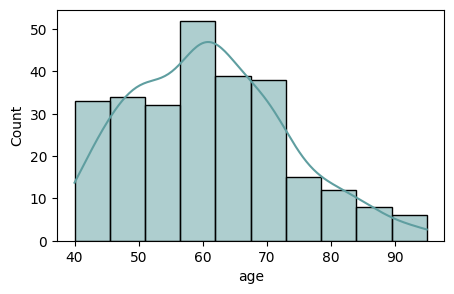

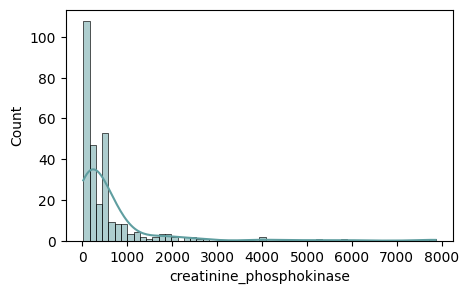

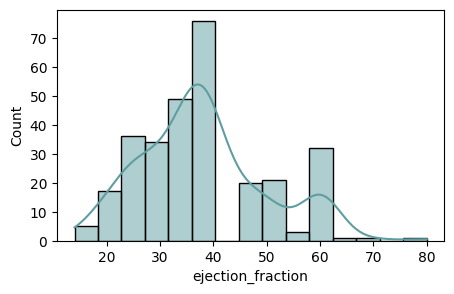

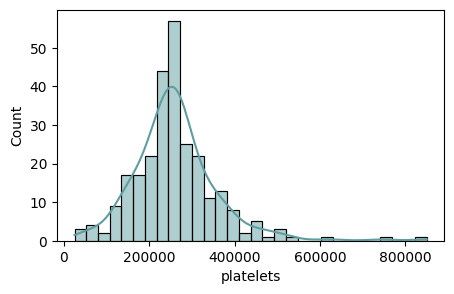

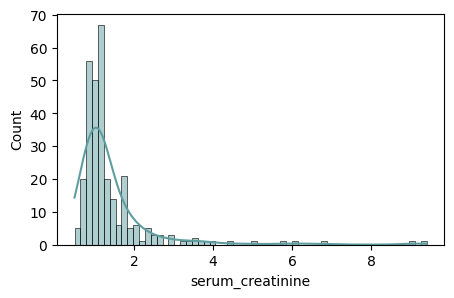

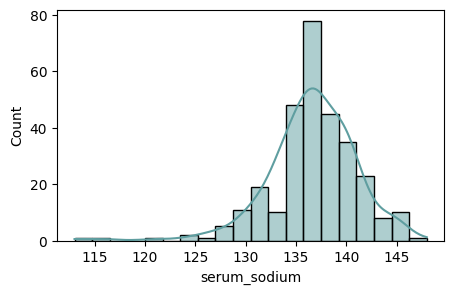

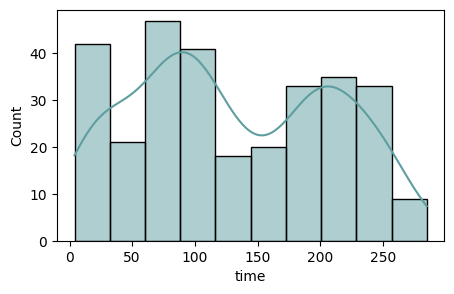

In [ ]:
# Visualisasikan fitur numerik continous (misal : histplot)
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    ax = sns.histplot(data=df, x=col, kde=True, color='#5F9EA0')

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

- Pada tahap ini, kita akan mengecek apakah terdapat data yang hilang atau tidak, terdapat duplikat atau tidak, dan apakah terdapat data yang tidak konsisten (bisa melakukan pengecekan nilai unik)

###Memeriksa Missing Value

In [ ]:
# Melihat Nilai null / missing value
df.isnull().sum()

,0
age,30
anemia,0
creatinine_phosphokinase,15
diabetes,0
ejection_fraction,3
high_blood_pressure,0
platelets,30
serum_creatinine,0
serum_sodium,0
sex,0


> Terlihat data kosong pada kolom age, creatinine_phosphokinase, ejection_fraction, platelets, dan smoking sehingga dibutuhkan handling missing value

###Memeriksa Data Duplikat

In [ ]:
# Melihat Data duplikat
df.duplicated().sum()

0

> Terlihat bahwa tidak ditemukan data terduplikasi

###Memeriksa Data yang Tidak Konsisten

In [ ]:
# Melihat Data yang tidak konsisten
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

Unique values in column 'age':
[75.    55.    65.    50.    90.    60.       nan 80.    62.    45.
 49.    82.    87.    70.    48.    68.    53.    95.    58.    94.
 85.    69.    72.    51.    57.    41.    42.    67.    79.    59.
 44.    63.    86.    43.    46.    61.    81.    52.    64.    40.
 60.667 77.    78.    54.    73.    47.    56.   ]

Unique values in column 'anemia':
[0 1]

Unique values in column 'creatinine_phosphokinase':
[ 582. 7861.  146.  111.  160.   47.  246.   nan  157.  123.   81.  231.
  981.  168.   80.  379.  149.  125.   52.  128.   63.  148.  112.  122.
   60.   70.   23.  249.  159.   94.  855. 2656.  235.  124.  571.  127.
  588. 1380.  553.  129.  577.   91. 3964.   69.  260.  371.   75.  789.
  364. 7702.  318.  109.   68.  110.  161.  113. 5882.  224.   92.  102.
  203.  336.   76.   55.  280.   78.   84.  115.   66.  897.  154.  144.
  133.  514.   59.  156.   61.  305.  898. 5209.   53.  328. 1876.  936.
  292.  369.  143.  754.  400.   96.  737

> Dari nilai unik dataset di atas, tidak ditemukan data yang tidak konsisten sehingga tidak diperluhan handling konsistensi data



## BAB 4 – (J.62DMI00.007.1) menentukan object data

**WAJIB DIISI**,

ADA BERAPA FITUR: '12'

ADA BERAPA RECORDS: '299'

ADA BERAPA FITUR YANG TIDAK DIGUNAKAN: '0'

TARGETNYA APA: 'death_event'

ADA BERAPA MODEL DATAFRAME YANG HARUS DIBUAT?: '4'

>Pada soal, diberikan perintah untuk membandingkan antara model yang menggunakan hanya 2 fitur dan model yang menggunakan seluruh fitur. Untuk mendukung perbandingan tersebut, maka saya mengisi bahwa fitur yang dibutuhkan berjumlah 12 dan tidak ada fitur yang tidak digunakan

###Melihat Informasi Dataset

In [ ]:
# Melihat kembali informasi dataset untuk memahami isi dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       269 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  284 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         296 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 269 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   275 non-null    float64
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


- Jika ada data yang tidak konsisten, silahkan di tangani pada proses dibawah ini.

In [ ]:
# jika terdapat data yang tidak konsisten

> Tidak ditemukan data yang tidak konsisten sehingga tidak diperlukan penanganan data tidak konsisten

###Menghapus Fitur yang Tidak Diperlukan

- Jika ada fitur yang tidak berguna, bisa dihapus pada cell dibawah ini

In [ ]:
# jika terdapar fitur yang tidak berguna

> Tidak ditemukan fitur yang tidak berguna sehingga tidak diperlukan penghapusan fitur yang tidak berguna

## BAB 5 – (J.62DMI00.008.1) membersihkan data
- **ANDA TIDAK PERLU MELAKUKAN OUTLIER REMOVAL** NAMUN HANDLE JIKA TERDAPAT DATA YANG KOSONG (TIDAK DIREKOMENDASIKAN MENGHAPUS), HANDLE JIKA ADA DUPLIKAT

###Handle Data Kosong

In [ ]:
# Memastikan kembali untuk melihat data kosong
df.isnull().sum()

,0
age,30
anemia,0
creatinine_phosphokinase,15
diabetes,0
ejection_fraction,3
high_blood_pressure,0
platelets,30
serum_creatinine,0
serum_sodium,0
sex,0


> Terdapat missing value pada kolom age, creatinine_phosphokinase, ejection_fraction, platelets, dan smoking sehingga dibutuhkan handling missing value

> Handling Missing Value dilakukan dengan menggunakan nilai mean pada data numerik dan nilai modus pada data kategorikal

In [ ]:
# Proses handle missing value
# Mengisi missing value dengan menggunakan nilai mean pada data numerik
df['age'].fillna(df['age'].mean(), inplace=True)
df['creatinine_phosphokinase'].fillna(df['creatinine_phosphokinase'].mean(), inplace=True)
df['ejection_fraction'].fillna(df['ejection_fraction'].mean(), inplace=True)
df['platelets'].fillna(df['platelets'].mean(), inplace=True)

# Mengisi missing value dengan menggunakan nilai modus pada data kategorikal
df['smoking'].fillna(df['smoking'].mode()[0], inplace=True)

<ipython-input-18-cf4782717f1f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-18-cf4782717f1f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Memastikan kembali sudah tidak ada data kosong
df.isnull().sum()

,0
age,0
anemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


> Terlihat bahwa sudah tidak ada data kosong

###Handle Data Duplikat

In [ ]:
# Cek duplikasi data & Handle jika terdapat duplikat data
df.duplicated().sum()

0

> Terlihat bahwa tidak terdapat data duplikasi

In [ ]:
# Proses handle data duplikat

> Karena tidak ditemukan data duplikasi, maka tidak dibutuhkan handle data duplikasi

- Dari pekerjaan Membersihkan Data yang telah anda lakukan, Bagaimana yang akan anda lakukan jika Dataset anda ternyata memiliki beberapa nilai kosong (missing value)?
- Jawab: Dari pekerjaan membersihkan data yang telah saya lakukan di atas, terdapat beberapa missing value pada dataset sehingga saya melakukan handling missing value dengan metode mean.

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data
CATATAN:
- **UNTUK UJIAN INI, ANDA TIDAK PERLU MELAKUKAN FEATURE ENGINEERING DISINI**
- NAMUN ANDA WAJIB MELAKUKAN SAMPLING UNTUK BALANCING CLASS (MENYEIMBANGKAN KELAS DENGAN SKEMA OVER SAMPLING), MENUNJUKKAN OUTLIER YANG TERDAPAT PADA DATASETS, DAN MENAMPILKAN HEATMAP KORELASI ANTAR FITUR UNTUK MENGETAHUI FITUR - FITUR YANG MEMILIKI KORELASI TINGGI DAN RENDAH PADA DATASETS

### Imbalance Data

death_event
0    203
1     96
Name: count, dtype: int64


<Axes: xlabel='death_event', ylabel='count'>

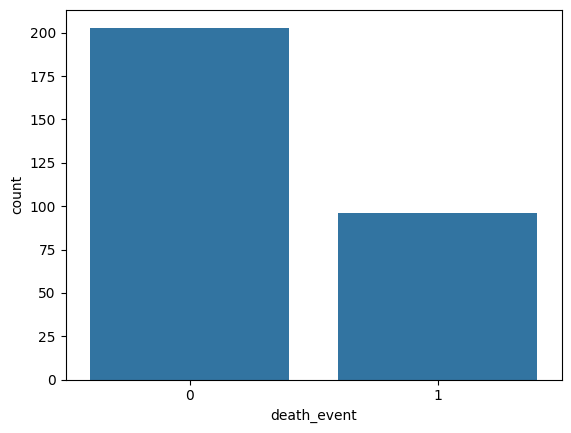

In [ ]:
# visualisasikan persebaran kelas menggunakan countplot
print(df['death_event'].value_counts())
sns.countplot(data=df, x='death_event')

> Terlihat bahwa data tidak seimbang sehingga dibutuhkan handle imbalance data

In [ ]:
# karena jumlah kelas target tidak seimbang, kita akan melakukan resampling
# Import Library
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Memisahkan kolom feature dan kolom target
X = df.drop("death_event",axis=1)
y = df['death_event']

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# proses resampling menggunakan RandomOverSampler
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_train, y_train)

In [ ]:
# Menggabungkan Datasets hasil resampling
df_smote = pd.concat([X_over, y_over], axis=1)
df_smote

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.000000,1,246.000000,0,15.000000,0,127000.000000,1.200000,137,1,0.000000,10,1
1,75.000000,0,99.000000,0,38.000000,1,224000.000000,2.500000,134,1,0.000000,162,1
2,60.667000,1,104.000000,1,30.000000,0,261182.344796,1.500000,136,1,0.000000,171,1
3,52.000000,0,132.000000,0,30.000000,0,218000.000000,0.700000,136,1,1.000000,112,0
4,94.000000,0,582.000000,1,38.000000,1,263358.030000,1.830000,134,1,0.000000,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,68.287889,0,435.388709,0,29.678335,0,312034.929107,1.153577,133,1,1.000000,73,1
332,60.180580,0,257.381597,0,36.826233,0,255558.202490,2.082623,132,0,1.000000,41,1
333,54.117438,0,281.931247,0,39.670605,1,217317.580035,2.332940,131,0,0.000000,76,1
334,52.528581,0,611.287844,0,25.774041,0,322207.800650,1.709482,137,0,0.679220,46,1


death_event
1    168
0    168
Name: count, dtype: int64


<Axes: xlabel='death_event', ylabel='count'>

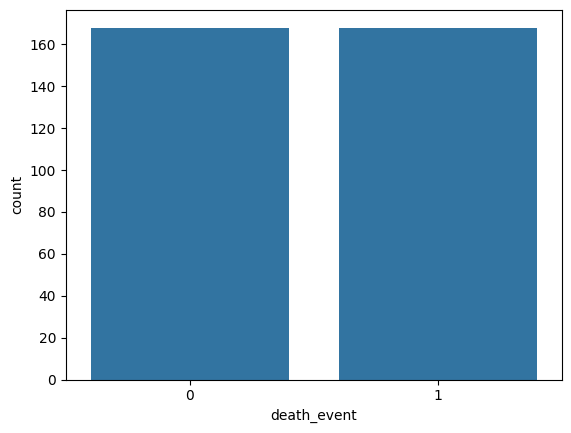

In [ ]:
# Tampilkan visualisasi persebaran kelas setelah melalui proses sampling
print(df_smote['death_event'].value_counts())
sns.countplot(data=df_smote, x='death_event')

> Terlihat bahwa data telah seimbang

###Outlier Data

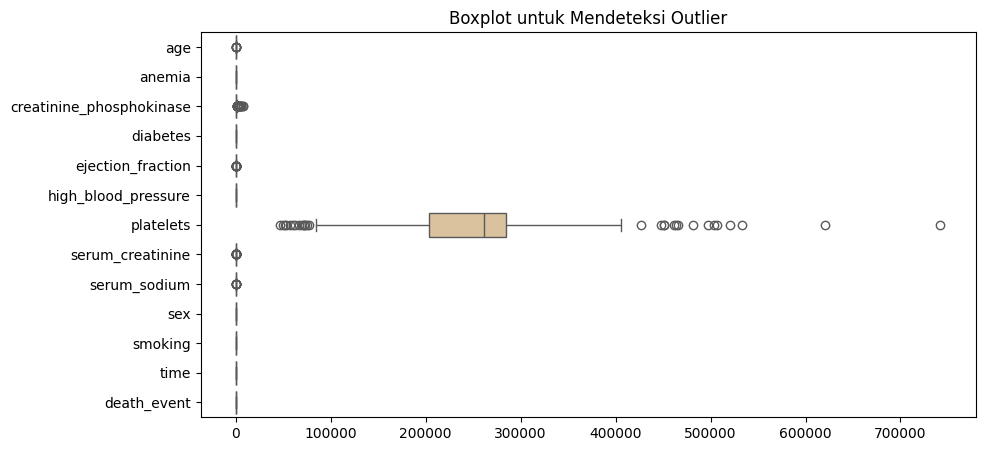

In [ ]:
# cek outlier dengan visualisasi (misalnya menggunakan boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(data=df_smote, orient="h", palette="Set2")
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

> Terlihat bahwa data memiliki beberapa outlier. Namun, saya tidak akan melakukan handling outlier karena pada soal terdapat larangan untuk melakukan handling ourlier

###Korelasi Data

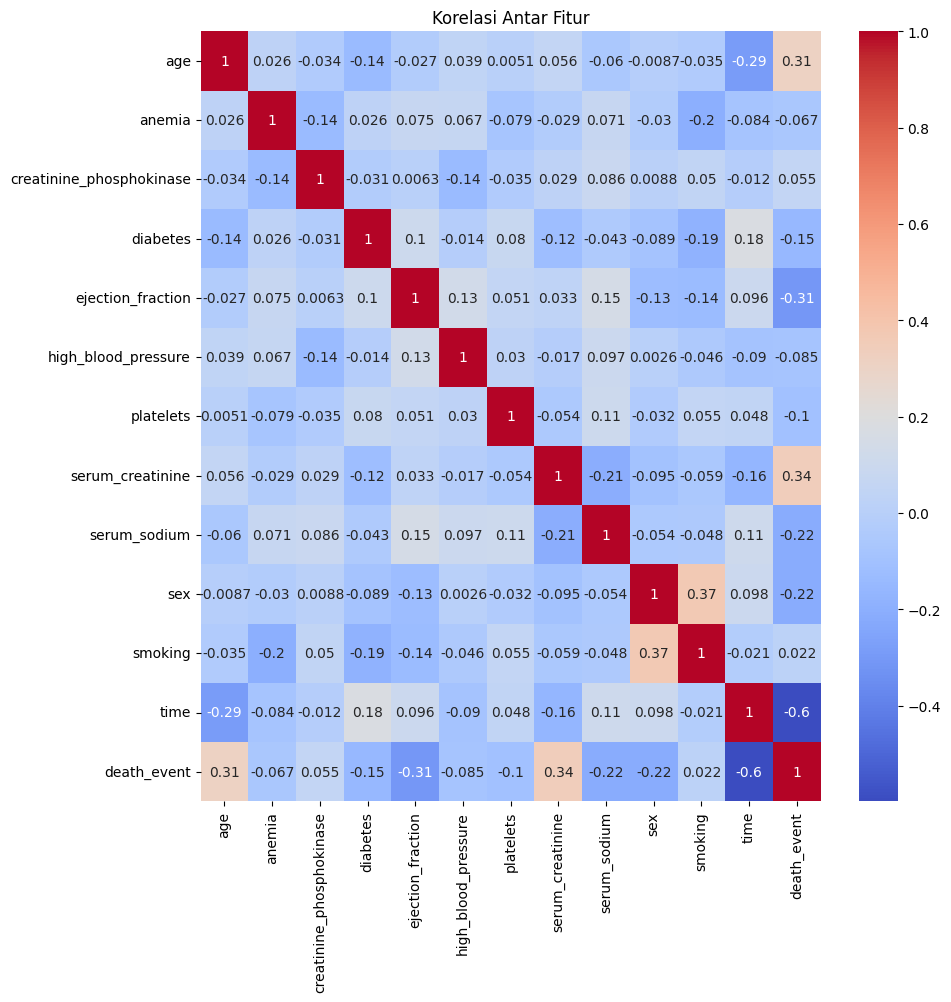

In [ ]:
# melihat korelasi antar fitur (heatmap)
plt.figure(figsize=(10, 10))
sns.heatmap(df_smote.corr(), annot=True, cmap="coolwarm")  # Korelasi antar fitur
plt.title("Korelasi Antar Fitur")
plt.show()

- DAPAT KITA LIHAT PADA HASIL KORELASI BAHWA `serum_creatinine` dan `ejection_fraction` MEMILIKI KORELASI YANG TINGGI, BAIK ITU POSITIF ATAU NEGATIF.
- PADA TAHAP SELANJUTNYA SILAHKAN BANDINGAN HASIL PEMODELAN KETIKA HANYA MENGGUNAKAN DUA KOLOM TERSEBUT () DENGAN KITA MENGGUNAKAN SEMUA KOLOM.
- SETELAH ITU JAWAB PERTANYAAN BERIKUT :    
  - DARI RATA - RATA SEMUA MODEL YANG DI BANDINGKAN (RF, KNN, DAN LOGISTIC REGRESSION) AKURASI YANG DI DAPATKAN LEBIH TINGGI YANG MENGGUNAKAN 2 FITUR SAJA ATAU SEMUA FITUR? : 'ISI DISINI'

###Membagi Data Untuk Melakukan Perbandingan

####2 Fitur

In [ ]:
# ambil hanya 2 fitur serum_creatinine dan ejection_fraction
df_2_fitur = df_smote[['serum_creatinine','ejection_fraction', 'death_event']]
df_2_fitur.head()

,serum_creatinine,ejection_fraction,death_event
0,1.20,15.0,1
1,2.50,38.0,1
2,1.50,30.0,1
3,0.70,30.0,0
4,1.83,38.0,1


>Setelah mengambil dua fitur, dapat terjadi perubahan jumlah duplikasi data sehingga perlu dilakukan pengecakan kembali apakah data pada dua fitur sudah bersih dari duplikasi data atau belum

In [ ]:
# Memeriksa data duplikat
df_2_fitur.duplicated().sum()

103

> Terlihat bahwa pada data dengan 2 fitur memiliki data duplikat sehingga dibutuhkan handle data duplikat

In [ ]:
# Proses handle data duplikat
df_2_fitur.drop_duplicates(inplace=True)

<ipython-input-32-3720f92ad4ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_fitur.drop_duplicates(inplace=True)


In [ ]:
# Memeriksa kembali apakah data telah bersih dari duplikat data
df_2_fitur.duplicated().sum()

0

> Sudah tidak ditemukan data duplikat

####12 Fitur

In [ ]:
# ambil semua fitur
df_all_fitur = df_smote
df_all_fitur.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.000,1,246.0,0,15.0,0,127000.000000,1.20,137,1,0.0,10,1
1,75.000,0,99.0,0,38.0,1,224000.000000,2.50,134,1,0.0,162,1
2,60.667,1,104.0,1,30.0,0,261182.344796,1.50,136,1,0.0,171,1
3,52.000,0,132.0,0,30.0,0,218000.000000,0.70,136,1,1.0,112,0
4,94.000,0,582.0,1,38.0,1,263358.030000,1.83,134,1,0.0,27,1


## BAB 7 – (J.62DMI00.010.1) menentukan label data

- Gunakan 2 nama variabel yang berbeda untuk proses splitting dataset baik untuk X,y,train,test contoh :    
  - `X_2_fitur` = Untuk menampung dataset yang akan dimodelkan menggunakan hanya 2 kolom utama.
  - `y_2_fitur` = Untuk menampung target / kelas yang akan diprediksi pada model dengan 2 kolom utama.
  - `X_2_train`,`X_2_test`, `y_2_train`, `y_2_test` = untuk menampung data yang dihasilkan `train_test_split` menggunakan `X_2_fitur` dan `y_2_fitur`

  - `X_all_fitur` = Untuk menampung semua dataset yang akan dimodelkan menggunakan.
  - `y_all_fitur` = Untuk menampung target / kelas yang akan diprediksi pada model dengan semua dataset.
  - `X_all_train`,`X_all_test`, `y_all_train`, `y_all_test` = untuk menampung data yang dihasilkan `train_test_split` menggunakan `X_all_fitur` dan `y_all_fitur`


- yang menjadi target adalah: 'death_event'
- yang menjadi fitur pada df_2_fitur adalah : 'serum_creatinine dan ejection_fraction'
- yang menjadi fitur pada df_all_fitur adalah : 'age, anemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets	serum_creatinine, serum_sodium, sex, smoking, dan time'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
# Memisahkan fitur dan target dataset 2 fitur
X_2_fitur = df_2_fitur.drop('death_event', axis = 1)
y_2_fitur = df_2_fitur['death_event']

In [ ]:
# Memisahkan fitur dan target dataset all fitur
X_all_fitur = df_all_fitur.drop('death_event', axis = 1)
y_all_fitur = df_all_fitur['death_event']

###Normalisasi Data

- ANDA PERLU MELAKUKAN NORMALISASI DISINI

> Sebelum dilakukan normalisasi, perlu dicek apakah normalisasi diperlukan atau tidak dengan cara melihat nilai rentang pada setiap kolom

In [ ]:
# Melihat nilai rentang di setiap kolom pada data df_2_fitur
for col in df_2_fitur.columns:
    print(f"Rentang Nilai pada kolom df_2_fitur '{col}':")
    print(f"Nilai Minimum: {df_2_fitur[col].min()}")
    print(f"Nilai Maksimum: {df_2_fitur[col].max()}")
    print()

Rentang Nilai pada kolom df_2_fitur 'serum_creatinine':
Nilai Minimum: 0.5
Nilai Maksimum: 9.0

Rentang Nilai pada kolom df_2_fitur 'ejection_fraction':
Nilai Minimum: 15.0
Nilai Maksimum: 80.0

Rentang Nilai pada kolom df_2_fitur 'death_event':
Nilai Minimum: 0
Nilai Maksimum: 1



In [ ]:
# Melihat nilai rentang di setiap kolom pada data df_all_fitur
for col in df_all_fitur.columns:
    print(f"Rentang Nilai pada kolom df_all_fitur '{col}':")
    print(f"Nilai Minimum: {df_all_fitur[col].min()}")
    print(f"Nilai Maksimum: {df_all_fitur[col].max()}")
    print()

Rentang Nilai pada kolom df_all_fitur 'age':
Nilai Minimum: 40.0
Nilai Maksimum: 95.0

Rentang Nilai pada kolom df_all_fitur 'anemia':
Nilai Minimum: 0
Nilai Maksimum: 1

Rentang Nilai pada kolom df_all_fitur 'creatinine_phosphokinase':
Nilai Minimum: 23.0
Nilai Maksimum: 7861.0

Rentang Nilai pada kolom df_all_fitur 'diabetes':
Nilai Minimum: 0
Nilai Maksimum: 1

Rentang Nilai pada kolom df_all_fitur 'ejection_fraction':
Nilai Minimum: 15.0
Nilai Maksimum: 80.0

Rentang Nilai pada kolom df_all_fitur 'high_blood_pressure':
Nilai Minimum: 0
Nilai Maksimum: 1

Rentang Nilai pada kolom df_all_fitur 'platelets':
Nilai Minimum: 47000.0
Nilai Maksimum: 742000.0

Rentang Nilai pada kolom df_all_fitur 'serum_creatinine':
Nilai Minimum: 0.5
Nilai Maksimum: 9.0

Rentang Nilai pada kolom df_all_fitur 'serum_sodium':
Nilai Minimum: 113
Nilai Maksimum: 146

Rentang Nilai pada kolom df_all_fitur 'sex':
Nilai Minimum: 0
Nilai Maksimum: 1

Rentang Nilai pada kolom df_all_fitur 'smoking':
Nilai Minimum

> Melihat rentang kolom yang bervariasi, maka diputuskan untuk melakukan normalisasi pada data

In [ ]:
# proses normalisasi / scalling
robust_scaler = RobustScaler()

X_2_fitur = robust_scaler.fit_transform(X_2_fitur)
X_all_fitur = robust_scaler.fit_transform(X_all_fitur)

- LAKUKAN SPLITTING DISINI

In [ ]:
# Splitting data untuk dataset yang hanya menggunakan 2 fitur
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_fitur, y_2_fitur, test_size=0.2, random_state=42)
X_2_train.shape, X_2_test.shape, y_2_train.shape, y_2_test.shape

((186, 2), (47, 2), (186,), (47,))

In [ ]:
# Splitting data untuk dataset yang menggunakan semua fitur
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all_fitur, y_all_fitur, test_size=0.2, random_state=42)
X_all_train.shape, X_all_test.shape, y_all_train.shape, y_all_test.shape

((268, 12), (68, 12), (268,), (68,))

- Dari pekerjaan Mengkonstruksi Data yang telah anda lakukan, bagaimana cara Anda menentukan fitur-fitur pada dataset anda perlu dinormalisasi atau tidak? : 'Penentuan apakah dataset perlu dinormalisasi atau tidak diputuskan berdasarkan rentang data yang terlihat bervariasi'

## BAB 8 – (J.62DMI00.013.1) membangun model
- BANGUN MODEL DENGAN MENGGUNAKAN ALGORITMA KLASIFIKASI SEPERTI RANDOM FOREST (RF), K-NEAREST NEIGHBOUR (KNN), DAN LOGISTIC REGRESSION (LR) UNTUK KEDUA DATASET (HANYA 2 FITUR & MEMAKAI SEMUA FITUR)

In [ ]:
# Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
rf_model_2_fitur = RandomForestClassifier(random_state=42)
knn_model_2_fitur = KNeighborsClassifier()
lr_model_2_fitur = LogisticRegression(random_state=42)

rf_model_all_fitur = RandomForestClassifier(random_state=42)
knn_model_all_fitur = KNeighborsClassifier()
lr_model_all_fitur = LogisticRegression(random_state=42)

### Random Forest

Random Forest Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.83      0.77      0.80        31

    accuracy                           0.74        47
   macro avg       0.72      0.73      0.72        47
weighted avg       0.75      0.74      0.75        47



<Axes: >

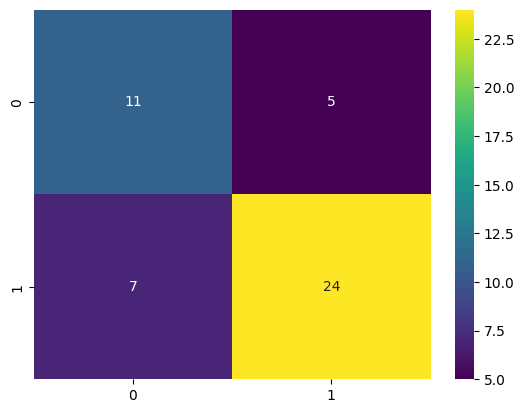

In [ ]:
rf_model_2_fitur.fit(X_2_train, y_2_train)
y_rf_pred_2_fitur = rf_model_2_fitur.predict(X_2_test)

# confusion matrix dan classification report
print("Random Forest Classifier 2 fitur")
print(classification_report(y_2_test, y_rf_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_rf_pred_2_fitur), annot=True, cmap='viridis')

Random Forest Classifier all fitur
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        37
           1       0.86      0.97      0.91        31

    accuracy                           0.91        68
   macro avg       0.91      0.92      0.91        68
weighted avg       0.92      0.91      0.91        68



<Axes: >

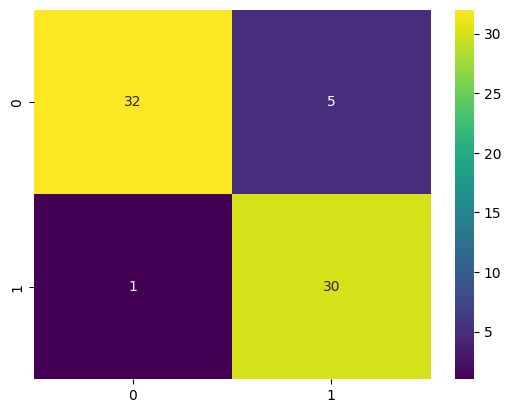

In [ ]:
rf_model_all_fitur.fit(X_all_train, y_all_train)
y_rf_pred_all_fitur = rf_model_all_fitur.predict(X_all_test)

# confusion matrix dan classification report
print("Random Forest Classifier all fitur")
print(classification_report(y_all_test, y_rf_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_rf_pred_all_fitur), annot=True, cmap='viridis')

### KNN

K-Nearest Neighbor Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.83      0.81      0.82        31

    accuracy                           0.77        47
   macro avg       0.74      0.75      0.74        47
weighted avg       0.77      0.77      0.77        47



<Axes: >

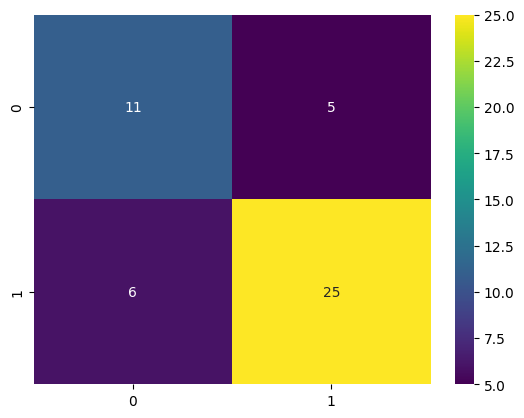

In [ ]:
knn_model_2_fitur.fit(X_2_train, y_2_train)
y_knn_pred_2_fitur = knn_model_2_fitur.predict(X_2_test)

# confusion matrix dan classification report
print("K-Nearest Neighbor Classifier 2 fitur")
print(classification_report(y_2_test, y_knn_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_knn_pred_2_fitur), annot=True, cmap='viridis')

K-Nearest Neighbor Classifier all fitur
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.76      0.81      0.78        31

    accuracy                           0.79        68
   macro avg       0.79      0.80      0.79        68
weighted avg       0.80      0.79      0.79        68



<Axes: >

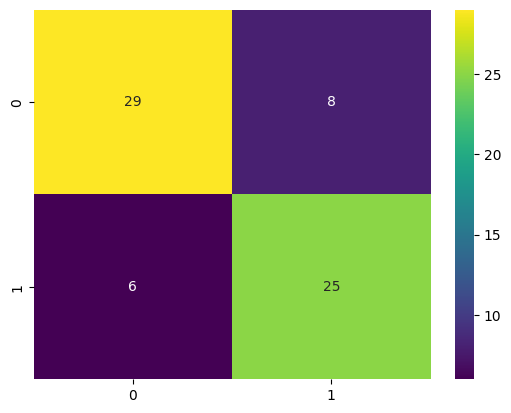

In [ ]:
knn_model_all_fitur.fit(X_all_train, y_all_train)
y_knn_pred_all_fitur = knn_model_all_fitur.predict(X_all_test)

# confusion matrix dan classification report
print("K-Nearest Neighbor Classifier all fitur")
print(classification_report(y_all_test, y_knn_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_knn_pred_all_fitur), annot=True, cmap='viridis')

### Logistic Regression

Logistic Regression Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        16
           1       0.79      0.74      0.77        31

    accuracy                           0.70        47
   macro avg       0.67      0.68      0.68        47
weighted avg       0.71      0.70      0.71        47



<Axes: >

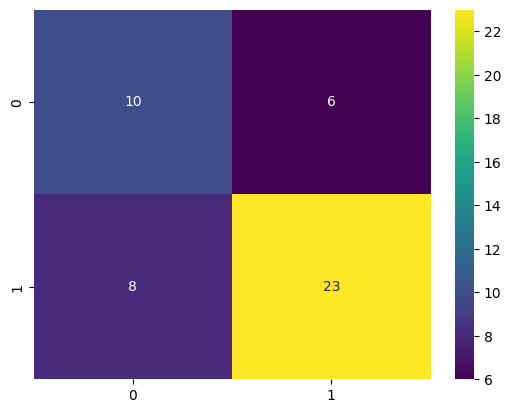

In [ ]:
lr_model_2_fitur.fit(X_2_train, y_2_train)
y_lr_pred_2_fitur = lr_model_2_fitur.predict(X_2_test)

# confusion matrix dan classification report
print("Logistic Regression Classifier 2 fitur")
print(classification_report(y_2_test, y_lr_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_lr_pred_2_fitur), annot=True, cmap='viridis')

Logistic Regression Classifier all fitur
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        37
           1       0.82      1.00      0.90        31

    accuracy                           0.90        68
   macro avg       0.91      0.91      0.90        68
weighted avg       0.92      0.90      0.90        68



<Axes: >

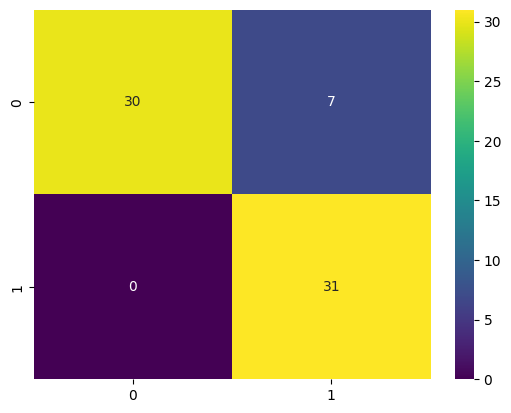

In [ ]:
lr_model_all_fitur.fit(X_all_train, y_all_train)
y_lr_pred_all_fitur = lr_model_all_fitur.predict(X_all_test)

# confusion matrix dan classification report
print("Logistic Regression Classifier all fitur")
print(classification_report(y_all_test, y_lr_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_lr_pred_all_fitur), annot=True, cmap='viridis')

> Setelah melakukan modeling diatas, dapat disimpulkan bahwa:
* akurasi tertinggi pada data 2 fitur terletak pada model KNN yaitu sebesar 77%
* akurasi tertinggi pada data all fitur terletak pada model Random Forest yaitu sebesar 91%
* dari keseluruhan model, data all fitur menghasilkan akurasi yang lebih tinggi dari pada data 2 fitur


- Dari pekerjaan Membangun Model yang telah anda lakukan, bagaimana cara Anda meningkatkan hasil akurasi pada sebuah model? : 'dengan melakukan optimisasi model'

###Optimisasi Model

> Lakukan optimisasi model dengan mencoba menggunakan parameter GridSearchCV pada model

In [ ]:
# Import Library
from sklearn.model_selection import GridSearchCV

In [ ]:
# Melakukan optimisasi pada model KNN dengan data 2 fitur
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]
                  }

knn_grid = GridSearchCV(knn_model_2_fitur, param_grid_knn, cv=5)
knn_grid.fit(X_2_train, y_2_train)

best_model_knn = knn_grid.best_estimator_
print("Best Parameters:", knn_grid.best_params_)

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


Best K-Nearest Neighbor Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.85      0.90      0.88        31

    accuracy                           0.83        47
   macro avg       0.82      0.80      0.80        47
weighted avg       0.83      0.83      0.83        47



<Axes: >

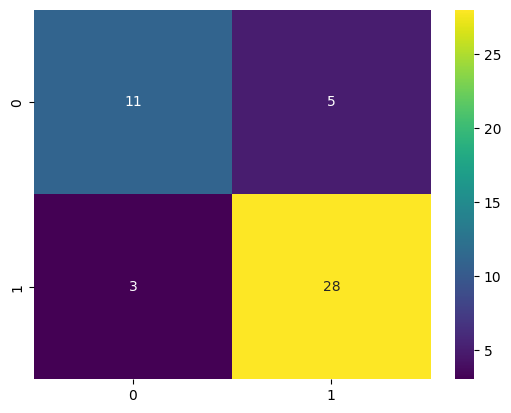

In [ ]:
# Evaluasi best_model_knn
best_y_knn_pred_2_fitur = best_model_knn.predict(X_2_test)

# confusion matrix dan classification report
print("Best K-Nearest Neighbor Classifier 2 fitur")
print(classification_report(y_2_test, best_y_knn_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, best_y_knn_pred_2_fitur), annot=True, cmap='viridis')

In [ ]:
# Melakukan optimisasi pada model Random Forest dengan data all fitur
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]
                 }
rf_grid = GridSearchCV(rf_model_all_fitur, param_grid_rf, cv=5)
rf_grid.fit(X_all_train, y_all_train)

best_model_rf = rf_grid.best_estimator_
print("Best Parameters:", rf_grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


Best Ramdom Forest Classifier all fitur
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        37
           1       0.86      1.00      0.93        31

    accuracy                           0.93        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.93      0.93        68



<Axes: >

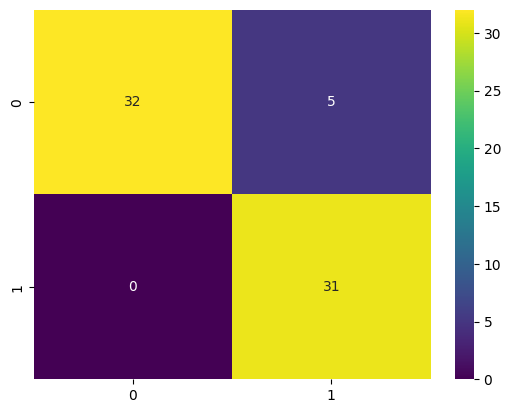

In [ ]:
# Evaluasi best_model_rf
best_y_rf_pred_all_fitur = best_model_rf.predict(X_all_test)

# confusion matrix dan classification report
print("Best Ramdom Forest Classifier all fitur")
print(classification_report(y_all_test, best_y_rf_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, best_y_rf_pred_all_fitur), annot=True, cmap='viridis')

## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan
- BANDINGKAN SEMUA MODEL UNTUK MENGETAHUI MODEL MANA YANG MEMILIKI AKURASI YANG TINGGI

In [ ]:
# Melihat dimensi data pada data 2 fitur
df_2_fitur.shape

(233, 3)

In [ ]:
# Melihat dimensi data pada data all fitur
df_all_fitur.shape

(336, 13)

> Untuk membandingkan model mana yang memiliki akurasi yang tinggi, komparasi yang dilakukan akan dipisah menurut data yang digunakan karena dimensi pada data 2 fitur berbeda dengan all fitur, sehingga tidak dapat dilakukan komparasi gabungan keseluruhan

<ipython-input-58-d349a6ec0722>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


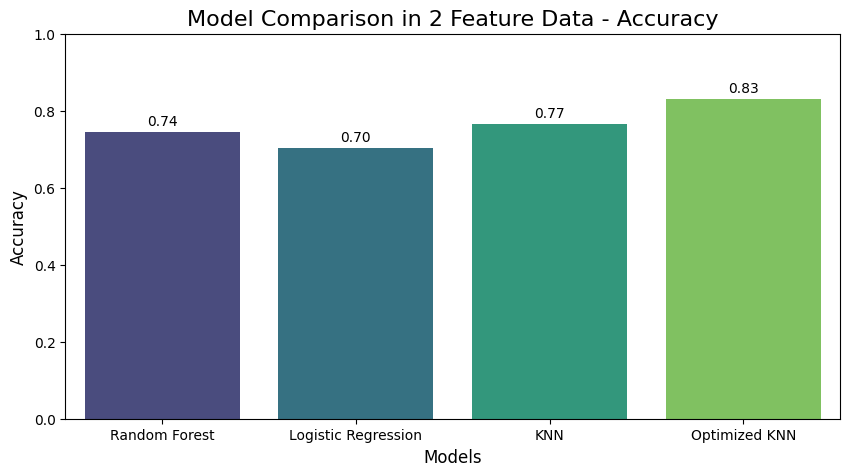

In [ ]:
# komparasi model pada data 2 fitur menggunakan visualisasi
# plot komparasi akurasi dari masing -masing model

models = ['Random Forest', 'Logistic Regression', 'KNN', 'Optimized KNN']
accuracies = [
    accuracy_score(y_2_test, y_rf_pred_2_fitur),
    accuracy_score(y_2_test, y_lr_pred_2_fitur),
    accuracy_score(y_2_test, y_knn_pred_2_fitur),
    accuracy_score(y_2_test, best_y_knn_pred_2_fitur)
]
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison in 2 Feature Data - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()

<ipython-input-59-5817cc39cb42>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


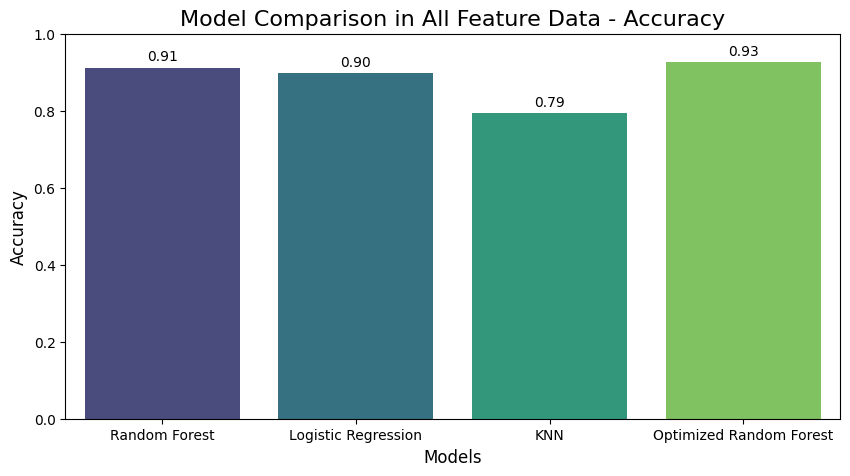

In [ ]:
# komparasi model pada data all fitur menggunakan visualisasi
# plot komparasi akurasi dari masing -masing model

models = ['Random Forest', 'Logistic Regression', 'KNN', 'Optimized Random Forest']
accuracies = [
    accuracy_score(y_all_test, y_rf_pred_all_fitur),
    accuracy_score(y_all_test, y_lr_pred_all_fitur),
    accuracy_score(y_all_test, y_knn_pred_all_fitur),
    accuracy_score(y_all_test, best_y_rf_pred_all_fitur)
]
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison in All Feature Data - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()

- 3 MODEL YANG MEMILIKI AKURASI TINGGI ? : 'Optimized Random Forest(93%), Random Forest(91%), Logistic Regression(90%)'
- Jelaskan :
'Setelah dilakukan pelatihan menggunakan dataset Heart Failure Prediction dengan tujuan untuk memprediksi tingkat kematian pasien, dapat diambil kesimpulan model terbaik yaitu Random Forest yang telah melalui optimisasi yaitu dengan perolehan akurasi 93%. Selain itu, metrik precision, recall, dan F1 Score pada model Random Forest juga mengalami peningkatan setelah dilakukan optimisasi.'
